# Python для анализа данных

*Татьяна Рогович, НИУ ВШЭ*


## Библиотека pandas. Работа с датами.

Очень часто мы сталкиваемся с переменными, обозначающими время. У работы с ними есть некоторые особенности, которые стоит вынести в отдельный небольшой блокнот. Здесь мы рассмотрим пример на наборе данных о встречах с НЛО.

In [2]:
import pandas as pd

/Users/i.pile/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/ufo/ufo.csv')

In [9]:
data.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [11]:
data.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [12]:
data.shape

(18241, 5)

In [13]:
data.size

91205

In [14]:
import duckdb

q = '''
SELECT COUNT(distinct City) 
FROM data
'''
duckdb.query(q).to_df()

,count(DISTINCT City)
0,6475


Посмотрим, что лежит в колонке Time.

In [23]:
data['Time'][0]

'6/1/1930 22:00'

In [24]:
type(data['Time'][0])

str

Можно такую историю распарсить вручную, а можно воспользоваться встроенным модулем datetime.

In [25]:
data['Time'] = pd.to_datetime(data['Time'])

In [26]:
type(data['Time'][0])

pandas._libs.tslibs.timestamps.Timestamp

Видим, что поменялся тип данных в переменной. Теперь посмотрим, что с этим можно делать.

In [27]:
data.head() # видим, что и вид данных поменялся

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


Так как это теперь объект timestamp, в его атрибутах зашиты элементы даты и мы можем к ним обращаться через ключевые слова.

In [29]:
data['Time'][0].year

1930

In [30]:
data['Time'][0].month

6

In [31]:
data['Time'][0].day

1

In [32]:
data['Time'][0].hour

22

In [33]:
data['Time'][0].minute

0

In [35]:
data['Time'][0].second

0

In [36]:
data['Time'][0].week # номер недели

22

In [37]:
data['Time'][0].day_name()

'Sunday'

Pandas способен распарсить очень много вариантов написания даты. А если он ломается всегда можно указать ему формат, в котором она записана. Можно составлять дату из нескольких колонок (посмотрим в другом примере). 

Подробнее смотрим документацию.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

Давайте, теперь попробуем использовать нашу новую переменную для аггрегации и фильтрации данных.

У модуля datetime есть атрибут, который превращает нашу переменную в объект Series, заполненную значениями, которые мы указали.

In [38]:
pd.to_datetime("4th of July, 2015")

Timestamp('2015-07-04 00:00:00')

И даже так.

In [44]:
# pd.to_datetime(['4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])

In [48]:
pd.to_datetime('1999-05-01', format='%Y-%d-%m', errors = "ignore")

Timestamp('1999-01-05 00:00:00')

Вернемся к тарелочкам.

In [52]:
data['Time'].dt.year.head() # вызвали колонку, обратились к атбриту .dt, выбрали в нем year, получили колонку заполненную годами.

0    1930
1    1930
2    1931
3    1931
4    1933
Name: Time, dtype: int32

In [53]:
data['Time'].dt.day_name().head() 

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [54]:
data

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


А вот такой объект уже можно использовать для группировки. Давайте посчитаем, сколько НЛО видели в разные годы.

<Axes: xlabel='Time'>

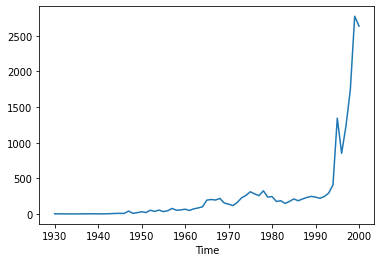

In [56]:
data.groupby(data['Time'].dt.year).size().plot()

In [57]:
data['dayofweek'] = data['Time'].dt.dayofweek
data['day_name'] = data['Time'].dt.day_name()

In [58]:
# .plot(kind = 'bar')
grouped = data\
.groupby(['dayofweek', 'day_name'])\
.size()\
.reset_index()

In [60]:
# grouped

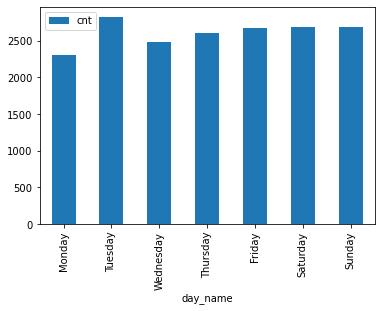

In [62]:
# grouped = data\
# .groupby(['dayofweek', 'day_name'])\
# .size()\
# .reset_index()

grouped.columns = ['dayofweek', 'day_name', 'cnt']
grouped.plot(x = 'day_name', 
             y = 'cnt',
             kind = 'bar')

In [ ]:
data.groupby(data['Time'].dt.dayofweek)
day_name().size()

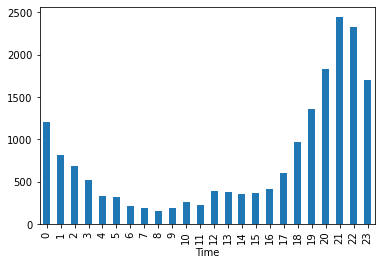

In [36]:
data.groupby(data['Time'].dt.hour).size().plot(kind = 'bar')

In [37]:
data.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


Посмотрим, какие есть города в нашем наборе данных

In [38]:
data['City'].value_counts()[data['City'].value_counts() > 50] # выберем только те, где НЛО видели больше 50 раз


Seattle          187
New York City    161
Phoenix          137
Houston          108
Las Vegas        105
Portland         102
San Diego        101
Los Angeles       98
Chicago           73
Austin            62
Miami             60
Tucson            58
Columbus          55
Albuquerque       54
Tacoma            52
Dallas            52
San Francisco     51
St. Louis         51
Name: City, dtype: int64

**В какой день недели чаще всего видели НЛО в Miami?**

In [36]:
data[data['City'] == 'Miami']['Time'].dt.day_name().value_counts().head(1)

Tuesday    12
Name: Time, dtype: int64

**Какой формы НЛО видели в 1956?**

In [41]:
data.groupby('Shape Reported').size().sort_values(ascending = False)


Shape Reported
LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
HEXAGON         1
DOME            1
PYRAMID         1
FLARE           1
dtype: int64

**В какие месяцы видели НЛО в разные годы?**

In [38]:
data['Month'] = data.Time.dt.month
data['Year'] = data.Time.dt.year
data.head()

,City,Colors Reported,Shape Reported,State,Time,Month,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,6,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,6,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,2,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,6,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,4,1933


In [41]:
data.groupby([data.Year, data.Month]).size()

Year  Month
1930  6          2
1931  2          1
      6          1
1933  4          1
1934  9          1
1935  6          1
1936  7          1
      10         1
1937  6          1
      8          1
1939  6          2
      7          1
1941  6          1
      7          1
1942  2          1
      6          1
      7          1
1943  4          1
      6          1
      8          2
      10         1
1944  1          3
      4          1
      6          2
      7          2
1945  1          1
      6          3
      7          2
      8          2
      12         1
              ... 
1998  7        156
      8        144
      9        215
      10       205
      11       189
      12       170
1999  1        126
      2        157
      3        149
      4        139
      5        171
      6        236
      7        262
      8        274
      9        362
      10       285
      11       418
      12       195
2000  1        198
      2        178
      3        202


Так же колонку timestamp можно сделать индексом.

In [42]:
data.index = data['Time']

In [43]:
data.head()

,City,Colors Reported,Shape Reported,State,Time
Time,,,,,
1930-06-01 22:00:00,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1930-06-30 20:00:00,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
1931-06-01 13:00:00,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
1933-04-18 19:00:00,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


И индексировать теперь можно поэлементно.

In [44]:
data.loc["2000-06-01"]

,City,Colors Reported,Shape Reported,State,Time
Time,,,,,
2000-06-01 00:00:00,Joshua Tree National Park,NaN,OVAL,CA,2000-06-01 00:00:00
2000-06-01 01:00:00,Auburn,NaN,OVAL,WA,2000-06-01 01:00:00
2000-06-01 02:00:00,San Francisco,NaN,FORMATION,CA,2000-06-01 02:00:00
2000-06-01 12:00:00,Powhatan,NaN,LIGHT,VA,2000-06-01 12:00:00
2000-06-01 13:00:00,Livonia,NaN,DISK,MI,2000-06-01 13:00:00
2000-06-01 15:00:00,Albuquerque,NaN,LIGHT,NM,2000-06-01 15:00:00
2000-06-01 15:00:00,Macon,NaN,OTHER,GA,2000-06-01 15:00:00
2000-06-01 17:00:00,Chattanooga,NaN,DISK,TN,2000-06-01 17:00:00
2000-06-01 20:00:00,Key West,NaN,FORMATION,FL,2000-06-01 20:00:00


In [45]:
data.loc["June 1 2000"] # то же самое

,City,Colors Reported,Shape Reported,State,Time
Time,,,,,
2000-06-01 00:00:00,Joshua Tree National Park,NaN,OVAL,CA,2000-06-01 00:00:00
2000-06-01 01:00:00,Auburn,NaN,OVAL,WA,2000-06-01 01:00:00
2000-06-01 02:00:00,San Francisco,NaN,FORMATION,CA,2000-06-01 02:00:00
2000-06-01 12:00:00,Powhatan,NaN,LIGHT,VA,2000-06-01 12:00:00
2000-06-01 13:00:00,Livonia,NaN,DISK,MI,2000-06-01 13:00:00
2000-06-01 15:00:00,Albuquerque,NaN,LIGHT,NM,2000-06-01 15:00:00
2000-06-01 15:00:00,Macon,NaN,OTHER,GA,2000-06-01 15:00:00
2000-06-01 17:00:00,Chattanooga,NaN,DISK,TN,2000-06-01 17:00:00
2000-06-01 20:00:00,Key West,NaN,FORMATION,FL,2000-06-01 20:00:00


Можем выбрать целый месяц в году.

In [46]:
data.loc["June 2000"].head()

,City,Colors Reported,Shape Reported,State,Time
Time,,,,,
2000-06-01 00:00:00,Joshua Tree National Park,NaN,OVAL,CA,2000-06-01 00:00:00
2000-06-01 01:00:00,Auburn,NaN,OVAL,WA,2000-06-01 01:00:00
2000-06-01 02:00:00,San Francisco,NaN,FORMATION,CA,2000-06-01 02:00:00
2000-06-01 12:00:00,Powhatan,NaN,LIGHT,VA,2000-06-01 12:00:00
2000-06-01 13:00:00,Livonia,NaN,DISK,MI,2000-06-01 13:00:00


In [47]:
data.loc["1965"].head() # Или целый год

,City,Colors Reported,Shape Reported,State,Time
Time,,,,,
1965-01-01 17:00:00,Mokena,NaN,LIGHT,IL,1965-01-01 17:00:00
1965-01-01 20:00:00,Conway,NaN,LIGHT,AR,1965-01-01 20:00:00
1965-01-01 20:00:00,St. Ansgar,NaN,FIREBALL,IA,1965-01-01 20:00:00
1965-02-01 07:30:00,Indianapolis,NaN,CIRCLE,IN,1965-02-01 07:30:00
1965-02-02 06:00:00,Seattle,NaN,SPHERE,WA,1965-02-02 06:00:00


На этом пока все, с timestamp обязательно столкнемся в будущем, особенно когда будем смотреть, как работать с временными рядами.